In [ ]:
##Functionality to display an 
##image with a box around detected faces 
##with labels to indicate matches or an “Unknown” label otherwise

In [70]:
from facenet_models import FacenetModel
from pathlib import Path
from camera import take_picture
import matplotlib.pyplot as plt
from matplotlib.pyplot import Rectangle
import numpy as np
from PIL import Image, ImageDraw

%matplotlib notebook

In [80]:
def describe_image(image):
    """Takes image, reshapes it, and returns descriptors, 
    probabilites, and landmarks
    
    
    Params
    --------
    image shape-(N, H, W, 3)
    
    
    
    Returns
    --------
    descriptors - np.ndarray, shape=(N, 512)
                  The descriptor vectors, where N is the number of faces.
                  
    probabilities - shape-(N,)  looks like: ([%%], dtype=float)
                    array of probabilities corresponding to each detected face
                    
    landmarks - shape-(N, 5, 2) 
                arrays of facial landmarks corresponding to each detected face."""
    model = FacenetModel()
    boxes, probabilities, landmarks = model.detect(image) #model detect returns boxes, prob%%, and landmark
    
    #-------
    fig,ax = plt.subplots()
    ax.imshow(image)
    
    for box, prob, lm in zip(boxes, probabilities, landmarks):
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(lm)):
        ax.plot(lm[i, 0], lm[i, 1], "+", color="blue")
    #-------
    
    descriptors = model.compute_descriptors(image, boxes)
    return descriptors, probabilities, landmarks

No camera config found, using defaults
	 port=0, exposure=0.7


<IPython.core.display.Javascript object>


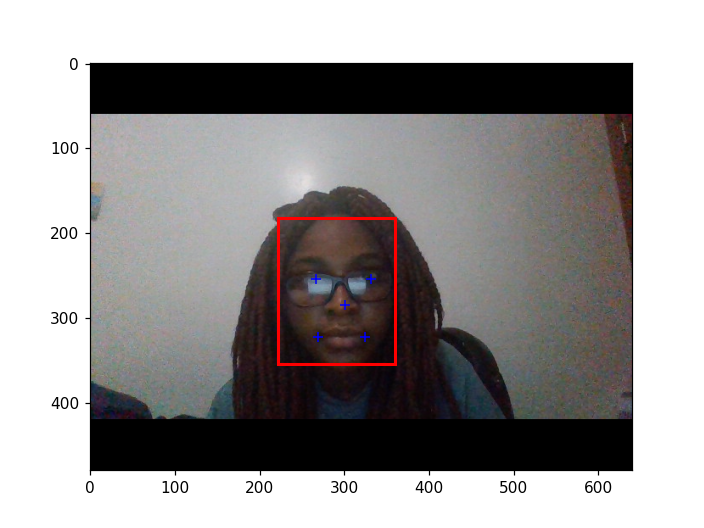

In [81]:
img_array = take_picture()
photoPath = r"C:\Users\tobec\Downloads\selenaGomez.jpg"
photo_img = Image.open(photoPath)
img = np.asarray(photo_img)
descriptor, probabilities, landmarks = describe_image(img_array)


In [69]:
#img_array = take_picture()  # returns shape-(H, W, C) array

#fig,ax = plt.subplots()
#ax.imshow(img_array)
#photoPath = r"C:\Users\tobec\Downloads\3faces.jpg"
#photo_img = Image.open(photoPath)
#img = np.asarray(photo_img)

#fig,ax = plt.subplots()
#ax.imshow(img)

#descriptor, boxes, prob, landmarks = describe_image(img)

#for box in boxes:
#    #1st, 2nd, 3rd, 4th number in (n, 4)
#    l, t, r, b = box
#    x, y = l, b ##coordinate of top left
#    width = r - l 
#    height = t - b
#box = patches.Rectangle((x, y), width, height, fill=None, lw=2, color="red")
#ax.add_patch(box)
#for box in boxes:
#        l, t, r, b = box
#        x, y = l, b
#        width = r - l
#        height = t - b

#boxes